In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
csv_base_path = ".\Csv_files"
plots_save_path = ".\Plots_Simulation"

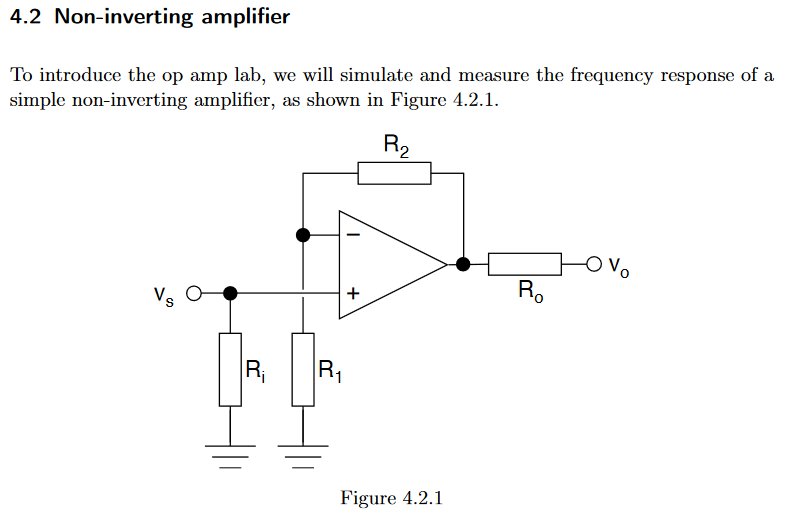 <br>

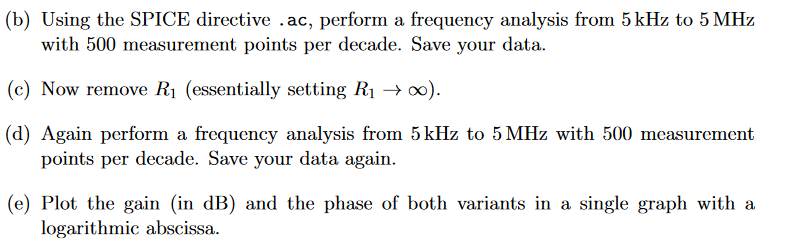

.\Csv_files\4_2_1_b.txt
         Freq.       Gain     Phase
0  5000.000000  33.977948 -0.837342
1  5023.078951  33.977941 -0.841207
2  5046.264430  33.977933 -0.845089
3  5069.556929  33.977925 -0.848989
4  5092.956940  33.977917 -0.852907
.\Csv_files\4_2_1_d.txt
         Freq.       Gain      Phase
0  5000.000000  70.675461 -89.870951
1  5023.078951  70.635461 -89.871954
2  5046.264430  70.595461 -89.872954
3  5069.556929  70.555462 -89.873952
4  5092.956940  70.515462 -89.874947
Maximum gain for this configuration is 33.9779484074906.
Maximum gain for this configuration is 70.6754608035582.


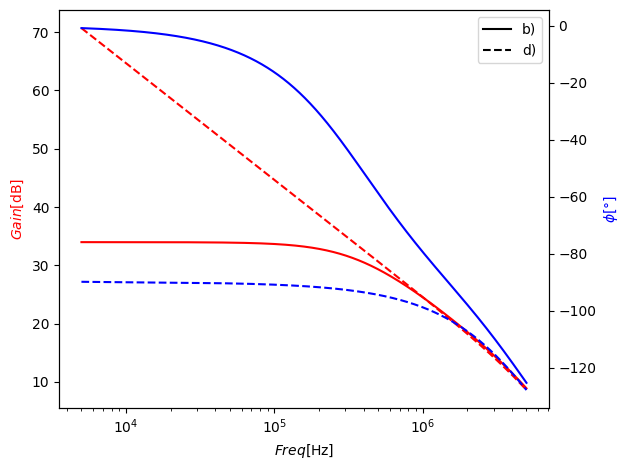

In [13]:
csv_file = os.path.join(csv_base_path, "4_2_1_b.txt")
print(csv_file)
current_data = []

with open(csv_file, 'r') as file:
    for line_idx, line in enumerate(file):
        if line_idx == 0:
            cols = line.strip().split("\t")
            cols = ["Freq.", "Gain", "Phase"]
        else: 
            if line.strip().startswith("Freq") or line.strip().startswith('v'):
                if current_data:
                    df = pd.DataFrame(current_data, columns=cols)
                    dfs.append(df)
                    current_data = []
            else:
                line = line.strip().split(sep="\t")
                val = np.zeros(3)
                val[0] = float(line[0])
                bracket = line[1].split(sep=",")
                val[1] = float(bracket[0][1:-2])
                val[2] = float(bracket[1][:-2])
                current_data.append(val)
df1 = pd.DataFrame(current_data, columns=cols)
print(df1.head())

csv_file = os.path.join(csv_base_path, "4_2_1_d.txt")
print(csv_file)
current_data = []

with open(csv_file, 'r') as file:
    for line_idx, line in enumerate(file):
        if line_idx == 0:
            cols = line.strip().split("\t")
            cols = ["Freq.", "Gain", "Phase"]
        else: 
            if line.strip().startswith("Freq") or line.strip().startswith('v'):
                if current_data:
                    df = pd.DataFrame(current_data, columns=cols)
                    dfs.append(df)
                    current_data = []
            else:
                line = line.strip().split(sep="\t")
                val = np.zeros(3)
                val[0] = float(line[0])
                bracket = line[1].split(sep=",")
                val[1] = float(bracket[0][1:-2])
                val[2] = float(bracket[1][:-2])
                current_data.append(val)
df2 = pd.DataFrame(current_data, columns=cols)
print(df2.head())



fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

styles = [["r", "r--"], ["b", "b--"]]
legends = ["b)", "d)"]


for df_idx, df in enumerate([df1, df2]):
    ax1.semilogx(df.loc[:, "Freq."], df.loc[:,"Gain"], styles[0][df_idx], label="--")
    ax1.set_ylabel("$Gain$[dB]", color="r")
    ax1.set_xlabel("$Freq$[Hz]")

    ax2.semilogx(df.loc[:, "Freq."], df.loc[:,"Phase"], styles[1][df_idx], label="-")
    ax2.set_ylabel("$\phi$[°]", color="b")

    print(f"Maximum gain for this configuration is {np.max(df.loc[:,'Gain'])}.")
handles, labels = plt.gca().get_legend_handles_labels()
# Updating the legend labels
legend = plt.legend(handles, legends)
for txt_idx, text in enumerate(legend.get_texts()):
    text.set_color('black')
    legend.legend_handles[txt_idx].set_color('k') 
plt.tight_layout()

plt.savefig(os.path.join(plots_save_path, "4_2_1_bd.png"))
plt.show()


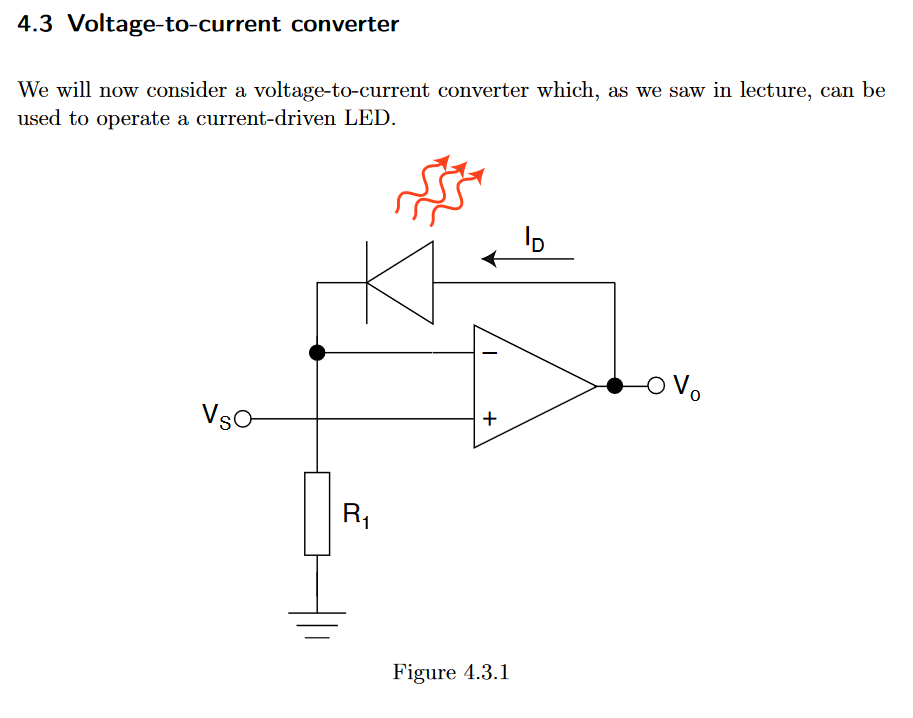

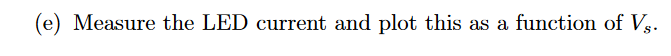

.\Csv_files\4_3_1_ef.txt
         vi        V(vd1)     V(vo)        I(Red)
0    -10.00 -3.224998e-08 -13.47791 -1.348791e-11
1     -9.99 -3.224529e-08 -13.47791 -1.348791e-11
2     -9.98 -3.224060e-08 -13.47791 -1.348791e-11
3     -9.97 -3.223591e-08 -13.47791 -1.348791e-11
4     -9.96 -3.223122e-08 -13.47790 -1.348790e-11
...     ...           ...       ...           ...
1996   9.96  9.959654e+00  10.69375  2.119075e-02
1997   9.97  9.969654e+00  10.70378  2.121203e-02
1998   9.98  9.979653e+00  10.71380  2.123331e-02
1999   9.99  9.989653e+00  10.72383  2.125458e-02
2000  10.00  9.999653e+00  10.73386  2.127586e-02

[2001 rows x 4 columns]


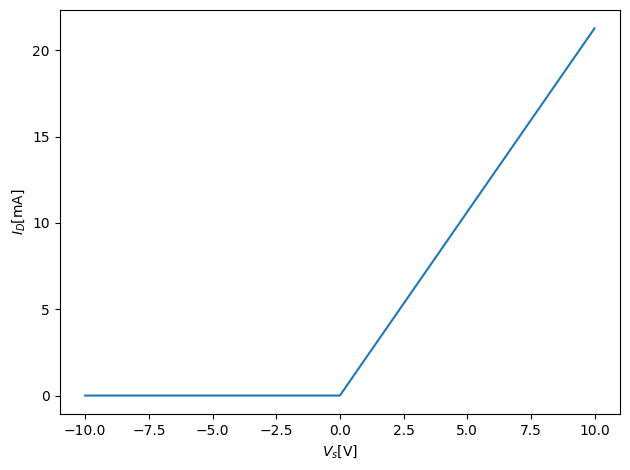

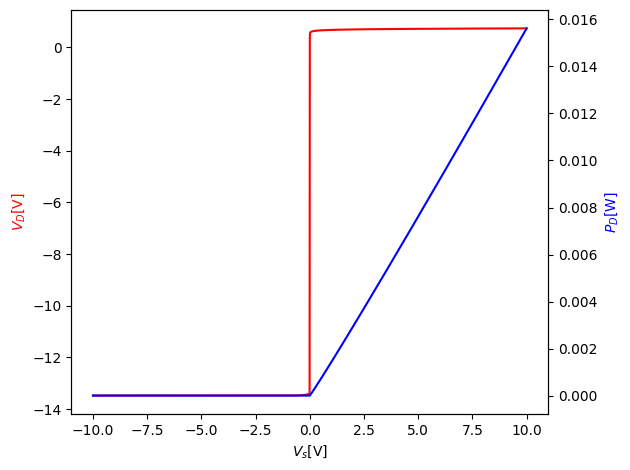

In [32]:
csv_file = os.path.join(csv_base_path, "4_3_1_ef.txt")
print(csv_file)
current_data = []
dfs = []

with open(csv_file, 'r') as file:
    for line_idx, line in enumerate(file):
        if line_idx == 0:
            cols = line.strip().split("\t")
        else: 
            if line.strip().startswith("Step") or line.strip().startswith('v'):
                if current_data:
                    df = pd.DataFrame(current_data, columns=cols)
                    dfs.append(df)
                    current_data = []
            else:
                current_data.append([float(val) for val in line.strip().split(sep="\t")])
df = pd.DataFrame(current_data, columns=cols)
print(df)


fig, ax = plt.subplots()
ax.plot(df.loc[:, "vi"], df.loc[:,"I(Red)"]*1e3)
ax.set_ylabel("$I_{D}$[mA]")
ax.set_xlabel("$V_s$[V]")

plt.tight_layout()
plt.savefig(os.path.join(plots_save_path, "4_3_1_e.png"))
plt.show()

voltage_drop = df.loc[:,"V(vo)"] - df.loc[:,"V(vd1)"]
power_gain = np.multiply(df.loc[:, "I(Red)"].to_numpy(), np.array(voltage_drop))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# We measure the current flowing through the LED and multiply it pointwise with the Voltage drop over the LED
ax1.plot(df.loc[:, "vi"], voltage_drop, "r")
ax1.set_ylabel("$V_D$[V]", c="r")
ax1.set_xlabel("$V_s$[V]")

ax2.plot(df.loc[:, "vi"], power_gain, "b")
ax2.set_ylabel("$P_D$[W]", c="b")

plt.tight_layout()
plt.savefig(os.path.join(plots_save_path, "4_3_1_f.png"))
plt.show()

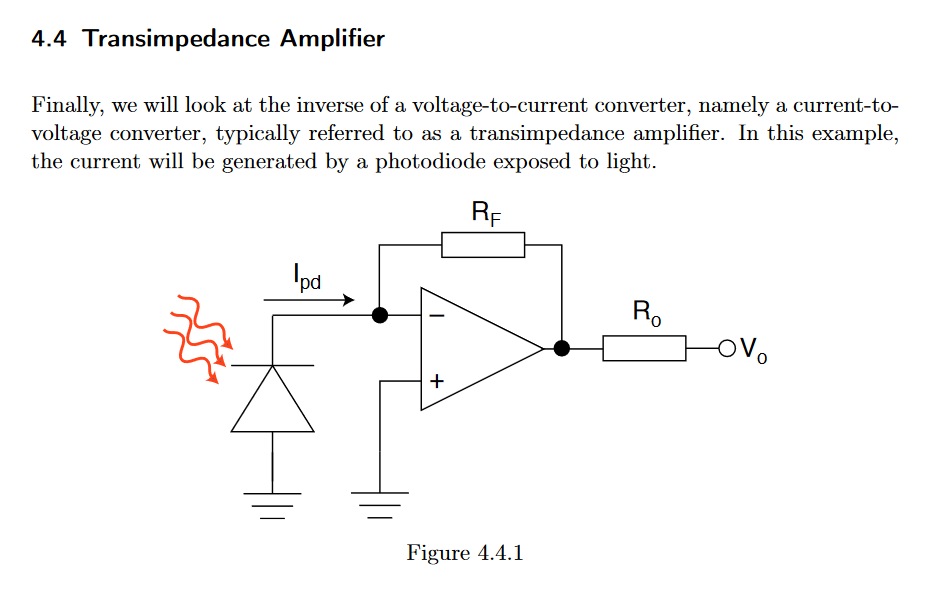
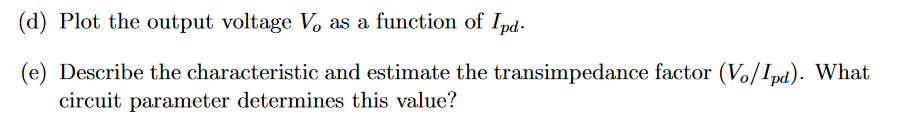

.\Csv_files\4_4_1_c.txt
            ipd     V(vo)
0 -5.000000e-07  5.000440
1 -4.900000e-07  4.900440
2 -4.800000e-07  4.800441
3 -4.700000e-07  4.700441
4 -4.600000e-07  4.600441


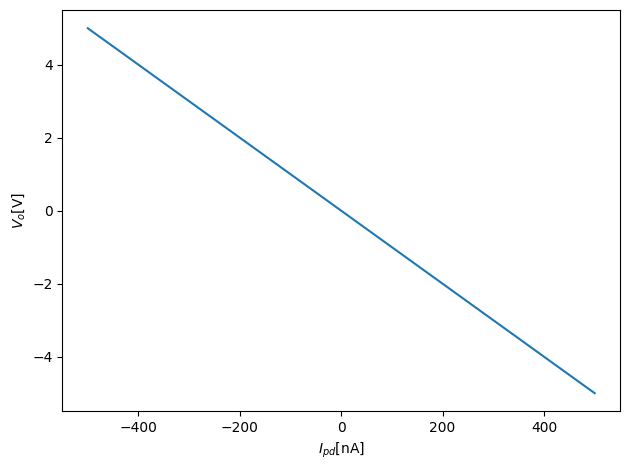

In [31]:
csv_file = os.path.join(csv_base_path, "4_4_1_c.txt")
print(csv_file)
current_data = []
dfs = []

with open(csv_file, 'r') as file:
    for line_idx, line in enumerate(file):
        if line_idx == 0:
            cols = line.strip().split("\t")
        else: 
            if line.strip().startswith("Step") or line.strip().startswith('v'):
                if current_data:
                    df = pd.DataFrame(current_data, columns=cols)
                    dfs.append(df)
                    current_data = []
            else:
                current_data.append([float(val) for val in line.strip().split(sep="\t")])
df = pd.DataFrame(current_data, columns=cols)
print(df.head())

fig, ax = plt.subplots()
ax.plot(df.loc[:, "ipd"]*1e9, df.loc[:,"V(vo)"])
ax.set_xlabel("$I_{pd}$[nA]")
ax.set_ylabel("$V_o$[V]")

plt.tight_layout()
plt.savefig(os.path.join(plots_save_path, "4_4_1_d.png"))
plt.show()